In [136]:
import mdtraj as md
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [165]:
ATP_color = [0.529, 0.429, 0.922]
dATP_color = [0.143, 0.476, 0.429]


In [3]:
# Apo 
#Representative,frames:,22309,8832,26492,5334,18483,27498,4316,13817,17498,7395,15800,11194,2079,14677,853,28735,29383,11960,24600,10352,23291,23800,159,19619,24968,14157,1670,3033,635,6092
apo_rep_frames = np.array([22309,8832,26492,5334,18483,27498,4316,13817,17498,7395,15800,11194,2079,14677,853,28735,29383,11960,24600,10352,23291,23800,159,19619,24968,14157,1670,3033,635,6092])

In [4]:
#ATP 
#Representative,frames:,26404,22071,2040,12190,8418,17576,20652,28082,14177,16395,4824,7104,18772,765,6054,3214,15524,21300,13394,10563,11750,9453,29482,3623,2541,29857,24001,22712,10126,27579
ATP_rep_frames = np.array([26404,22071,2040,12190,8418,17576,20652,28082,14177,16395,4824,7104,18772,765,6054,3214,15524,21300,13394,10563,11750,9453,29482,3623,2541,29857,24001,22712,10126,27579])

In [5]:
# dATP 
#Representative,frames:,15226,6069,22172,25924,2756,20438,13122,881,8438,19515,23669,11903,10587,27940,9585,27249,3850,29046,18743,10958,17642,29391,28523,29757,9135,18106,3148,129,18378,11359

dATP_rep_frames = np.array([15226,6069,22172,25924,2756,20438,13122,881,8438,19515,23669,11903,10587,27940,9585,27249,3850,29046,18743,10958,17642,29391,28523,29757,9135,18106,3148,129,18378,11359])

In [6]:
import pyemma as pe

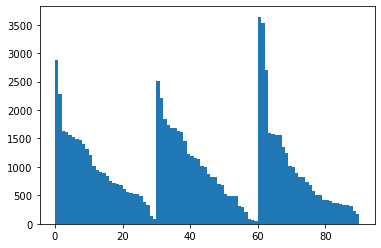

In [7]:
apo_cluster_labels = pd.read_csv('/home/marcus/Documents/SERCA/serca-atp-datp/simulation_structures/stripped_trajectories/human_apo/30_cnumvtime.dat', delim_whitespace=True).C1.values
ATP_cluster_labels = pd.read_csv('/home/marcus/Documents/SERCA/serca-atp-datp/simulation_structures/stripped_trajectories/human_ATP/30_cnumvtime.dat', delim_whitespace=True).C1.values
dATP_cluster_labels = pd.read_csv('/home/marcus/Documents/SERCA/serca-atp-datp/simulation_structures/stripped_trajectories/human_dATP/30_cnumvtime.dat', delim_whitespace=True).C1.values

all_cluster_labels = np.concatenate((apo_cluster_labels, ATP_cluster_labels+30, dATP_cluster_labels+60))
plt.hist(all_cluster_labels, 
        bins = np.arange(91))
plt.show()

In [8]:
traj_files = ['/home/marcus/Documents/SERCA/serca-atp-datp/simulation_structures/stripped_trajectories/human_PCA_analysis/CA_apo.nc',
             '/home/marcus/Documents/SERCA/serca-atp-datp/simulation_structures/stripped_trajectories/human_PCA_analysis/CA_ATP.nc',
             '/home/marcus/Documents/SERCA/serca-atp-datp/simulation_structures/stripped_trajectories/human_PCA_analysis/CA_dATP.nc']

In [9]:
# Note: Trajectories are CA only 
# All topologies should be the same 

traj = md.load(traj_files, 
        top = '/home/marcus/Documents/SERCA/serca-atp-datp/simulation_structures/stripped_trajectories/human_PCA_analysis/CA_apo.parm7')

In [10]:
aligned_traj = traj.superpose(traj, frame = 0)

In [11]:
coords = aligned_traj.xyz

In [12]:
new_coords = np.reshape(coords, (90000, 992*3))

In [92]:
new_coords.shape

scaler = StandardScaler()

scaled_coords = scaler.fit_transform(new_coords)
scaled_coords



array([[ 0.7044183 ,  0.4030019 , -0.6022391 , ...,  1.0069839 ,
        -0.8246855 , -1.4056984 ],
       [ 0.8494839 ,  0.9463649 ,  0.20331933, ...,  0.55100226,
        -1.0415075 , -1.3990496 ],
       [ 1.476486  ,  0.8785174 ,  0.07562888, ...,  0.5459124 ,
        -0.98209727, -1.4928354 ],
       ...,
       [-1.0731533 , -1.3502693 , -1.7927448 , ..., -1.037828  ,
        -0.22079363,  0.79910374],
       [-1.0988101 , -0.7859187 , -1.6296028 , ..., -1.1065179 ,
        -0.09998015,  0.71096677],
       [-0.9825441 , -1.6835977 , -2.024227  , ..., -0.8338223 ,
        -0.25062782,  0.4651509 ]], dtype=float32)

In [138]:
pca = PCA(n_components = 5)
fitted = pca.fit_transform(new_coords)
        

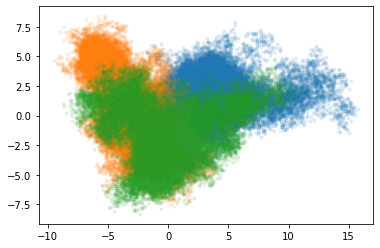

In [139]:

for i in range(1,3):
    plt.plot(fitted[30000*i:30000*(i+1),0], fitted[30000*i:30000*(i+1),1], '.', alpha = 0.1)
i = 0
plt.plot(fitted[30000*i:30000*(i+1),0], fitted[30000*i:30000*(i+1),1], '.', alpha = 0.1)

(<Figure size 432x288 with 2 Axes>, <AxesSubplot:>)

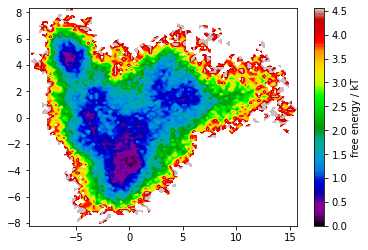

In [140]:
pe.plots.plot_free_energy(fitted[:,0], fitted[:,1])

In [141]:
np.cumsum(pca.explained_variance_ratio_)

array([0.25915008, 0.39770044, 0.51724274, 0.5722254 , 0.61589551])

<BarContainer object of 5 artists>

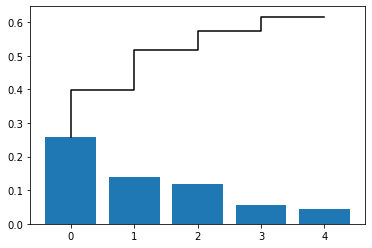

In [110]:

plt.step(np.arange(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_), where = 'pre', color = 'k')
plt.bar(np.arange(5),(pca.explained_variance_ratio_))

Text(0, 0.5, 'PC 2')

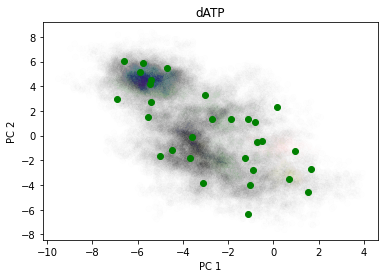

In [143]:
plt.scatter(fitted[60000:90000,0], fitted[60000:90000, 1], c = all_cluster_labels[60000:90000], alpha = 0.005)
plt.scatter(fitted[60000+dATP_rep_frames, 0],fitted[60000+dATP_rep_frames, 1], color = 'green')
plt.title('dATP')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

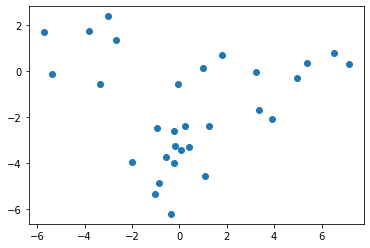

In [112]:
plt.scatter(fitted[apo_rep_frames, 0],fitted[apo_rep_frames, 1])

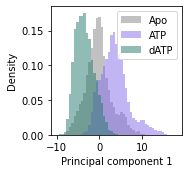

In [194]:
#plt.hist(Apo_A_N_dist_GaMD_human_avg, bins = 40, alpha = 0.5, density = True, label = 'Apo', color=[0.517, 0.517, 0.517])
plt.figure(figsize = (6/2.54,6/2.54))
plt.hist(all_pc_df['PC 1'][all_pc_df.sim=='apo'], bins = np.linspace(-10,18,50),
        color=[0.517, 0.517, 0.517], 
        alpha= 0.5, 
        label = 'Apo',
        density = True)
plt.hist(all_pc_df['PC 1'][all_pc_df.sim=='ATP'], bins = np.linspace(-10,18,50), color= ATP_color, alpha = 0.5, 
        label = 'ATP', 
        density = True)
plt.hist(all_pc_df['PC 1'][all_pc_df.sim=='dATP'], bins = np.linspace(-10,18,50), color = dATP_color, alpha = .5,
        label = 'dATP', 
        density = True)

plt.ylabel('Density', fontsize = 10)
plt.xlabel('Principal component 1', fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(fontsize = 10)

plt.savefig('PC_1_figure.pdf', transparent = True)

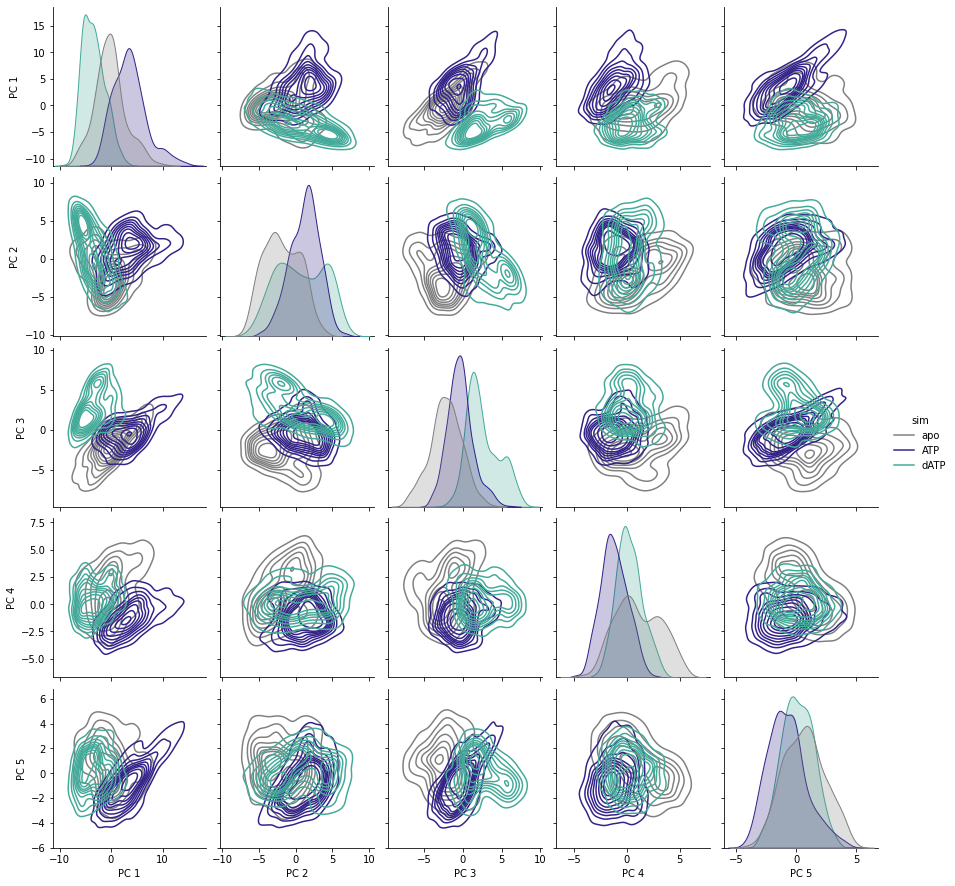

In [114]:
all_pc_df = pd.DataFrame(fitted)
all_pc_df.columns = ['PC 1','PC 2','PC 3','PC 4','PC 5']
all_pc_df['sim'] = 'apo'
all_pc_df.loc[30000:60000, 'sim'] = 'ATP'
all_pc_df.loc[60000:90000, 'sim'] = 'dATP'

sns.pairplot(all_pc_df.iloc[0:-1:50], kind = 'kde', diag_kind = 'kde', hue = 'sim', palette= ['gray', ATP_color, dATP_color])

In [135]:
all_loc_df

NameError: name 'all_loc_df' is not defined

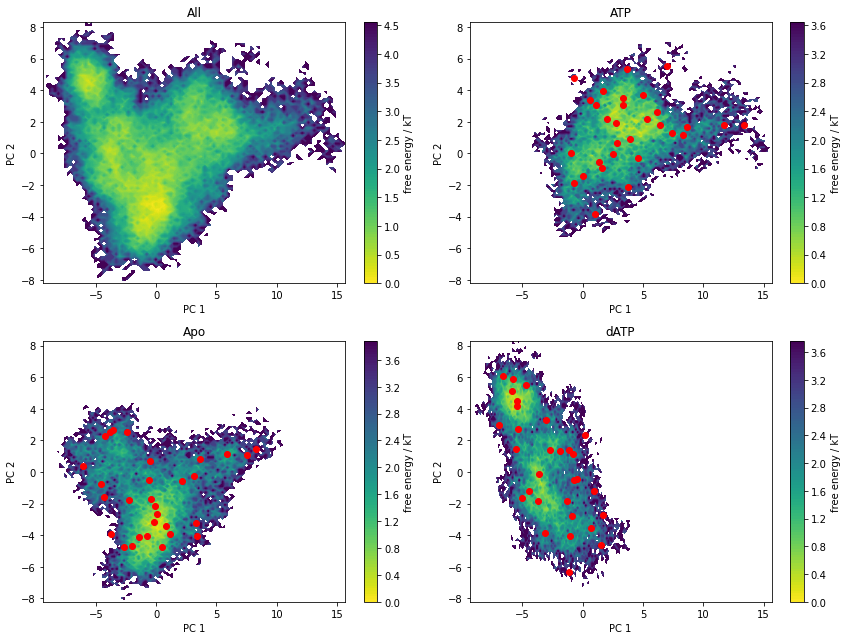

In [115]:
fig, ax = plt.subplots(2,2,figsize = (12,9))


pe.plots.plot_free_energy(fitted[:,0], fitted[:, 1], cmap = 'viridis_r',
                          ax = ax[0,0])
ax[0,0].set_title('All')
xlim = ax[0,0].get_xlim()
ylim = ax[0,0].get_ylim()

pe.plots.plot_free_energy(fitted[0:30000,0], fitted[0:30000, 1], cmap = 'viridis_r', 
                         ax = ax[1,0])
ax[1,0].scatter(fitted[ATP_rep_frames, 0],fitted[ATP_rep_frames, 1], color = 'red')
ax[1,0].set_title('Apo')
ax[1,0].set_xlim(xlim)
ax[1,0].set_ylim(ylim)


pe.plots.plot_free_energy(fitted[30000:60000,0], fitted[30000:60000, 1],cmap = 'viridis_r', 
                         ax = ax[0,1])
ax[0,1].scatter(fitted[30000+ATP_rep_frames, 0],fitted[30000+ATP_rep_frames, 1], color = 'red')
ax[0,1].set_title('ATP')
ax[0,1].set_xlim(xlim)
ax[0,1].set_ylim(ylim)

pe.plots.plot_free_energy(fitted[60000:90000,0], fitted[60000:90000, 1], cmap = 'viridis_r', 
                         ax = ax[1,1])
ax[1,1].scatter(fitted[60000+dATP_rep_frames, 0],fitted[60000+dATP_rep_frames, 1], color = 'red')
ax[1,1].set_title('dATP')
ax[1,1].set_xlim(xlim)
ax[1,1].set_ylim(ylim)
for i in range(2):
    for j in range(2):
        ax[i,j].set_xlabel('PC 1')
        ax[i,j].set_ylabel('PC 2')
        
plt.tight_layout()

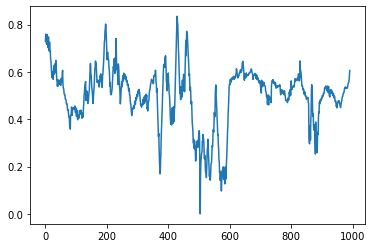

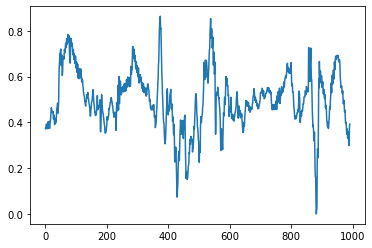

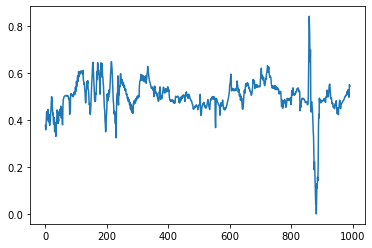

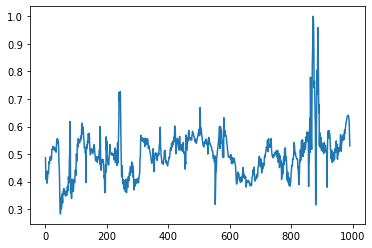

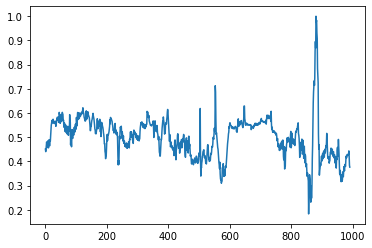

In [118]:
for n_pc in range(5):
    plt.figure()
    pc_sum = (pca.components_[n_pc].reshape((992,3))[:,0])+(pca.components_[n_pc].reshape((992,3))[:,1])+(pca.components_[n_pc].reshape((992,3))[:,2])
    
    pc_norm = pc_sum / max(np.abs(pc_sum))/2+0.5
    f = open('/home/marcus/Documents/SERCA/serca-atp-datp/test{}.tcl'.format(n_pc), 'w')
    for i in range(992):
        #print('set sel '.format(i))
        line = '[atomselect top "resid {}"] set beta {}\n'.format(i,pc_norm[i])
        #print(line)
        f.write(line)

    f.close()
    
    plt.plot(np.arange(992),pc_norm)
    plt.show()

In [119]:
pc_norm = pc_sum / max(pc_sum)
f = open('/home/marcus/Documents/SERCA/serca-atp-datp/test.tcl', 'w')
for i in range(992):
    #print('set sel '.format(i))
    line = '[atomselect top "resid {}"] set beta {}\n'.format(i,pc_norm[i])
    #print(line)
    f.write(line)
    
f.close()

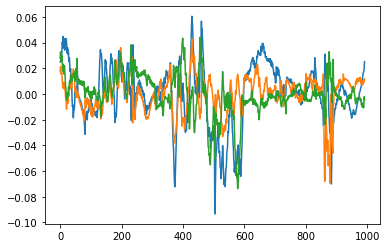

In [134]:
plt.plot((pca.components_[0].reshape((992,3))[:,0]))
plt.plot((pca.components_[0].reshape((992,3))[:,1]))
plt.plot((pca.components_[0].reshape((992,3))[:,2]))